In [1]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Ha

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_MotionCapture/
/V

In [9]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

In [10]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    c0 = np.array([0,0,0])/256
    c1 = np.array([150,0,0])/256
    c2 = np.array([0,0,100])/256
    c3 = np.array([0,100,0])/256

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4], ['Remote', 'Motion'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [11]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

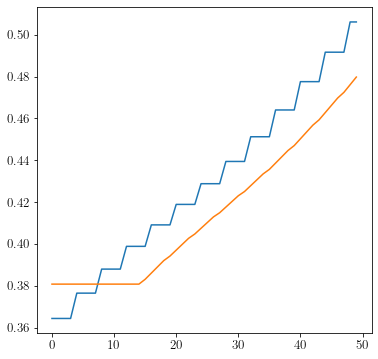

In [12]:
logs1 = logs.copy()

logs1['first remote'][0]['dronePositionFiltered.x'] = running_average(logs1['first remote'][0]['dronePosition.x'], 15)

plt.figure(figsize=(6,6))

plt.plot(logs1['first remote'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first remote'][0]['dronePositionFiltered.x'][0:50])

# Plot Trajectories

1758
2853
1816
1311
1382
1783
1583
713
3575
2078
1651
1058
552
1416
696
881
831
1593
1525
1570
836
1071
734
1646
1339
629
1464
731
631
1234
937
873
1517
547
576
828


2853

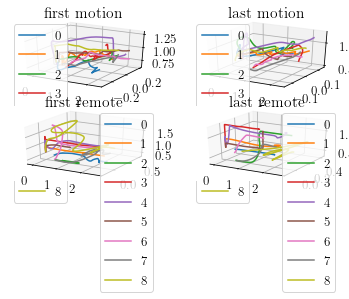

In [13]:
plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label = str(idx1))
        print(len(log))
    plt.legend()
    plt.title(fields[idx])
#     define_plot_pos(ax)
len(logs['first motion'][1])

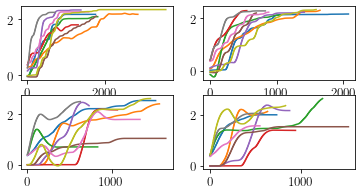

In [14]:
plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx)
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'])

# Collision Analysis

In [15]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Bidir - haptics X HW - Sheet1.csv')

dist = coll_df.copy().Distance.values[:]

dist[dist>0] = 0
dist[dist<0] = 1

coll_df['Collided'] = dist

coll_df

,Index,Run,Subject,Interface,Distance,Collided
0,1,1,1,Motion,22,0
1,2,2,1,Motion,5,0
2,3,3,1,Motion,21,0
3,4,4,1,Motion,12,0
4,5,5,1,Motion,14,0
5,6,1,1,Remote,25,0
6,7,2,1,Remote,18,0
7,8,3,1,Remote,24,0
8,9,4,1,Remote,12,0
9,10,5,1,Remote,26,0


In [16]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
print(coll['motion'])
print(coll['remote'])

    Index  Run  Subject Interface  Distance  Collided
0       1    1        1    Motion        22         0
1       2    2        1    Motion         5         0
2       3    3        1    Motion        21         0
3       4    4        1    Motion        12         0
4       5    5        1    Motion        14         0
10     11    1        2    Motion        12         0
11     12    2        2    Motion        14         0
12     13    3        2    Motion        -1         1
13     14    4        2    Motion        35         0
14     15    5        2    Motion        18         0
20     21    1        3    Motion        32         0
21     22    2        3    Motion        10         0
22     23    3        3    Motion        14         0
23     24    4        3    Motion        22         0
24     25    5        3    Motion        22         0
30     31    1        4    Motion        15         0
31     32    2        4    Motion        22         0
32     33    3        4    M


consider all runs

mean motion =  0.25
std motion =  0.4330127018922193
mean remote =  0.75
std remote =  0.82915619758885

total motion =  1
total remote =  3

p = 0.4046567619272864

consider first runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.25
std remote =  0.4330127018922193

total motion =  0
total remote =  1

p = 0.3173105078629121

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.25
std remote =  0.4330127018922193

total motion =  0
total remote =  1

p = 0.3173105078629121


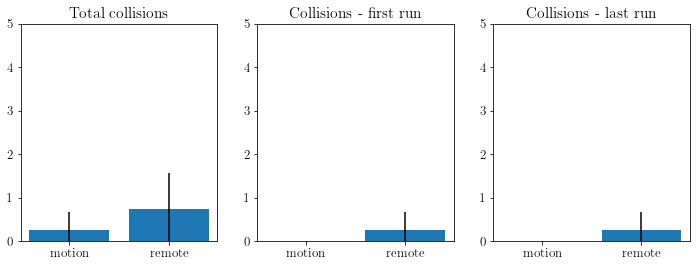

In [17]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')


all_r_X = all_r
all_m_X = all_m

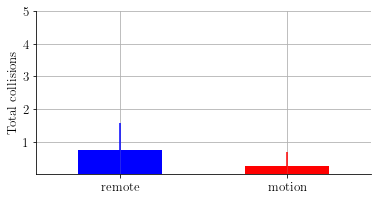

In [18]:

c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([1,2,3,4,5])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Approach wall Analysis

In [19]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [20]:
x_max = {}


x_max['motion'] = coll['motion']['Distance'].values/100
x_max['remote'] = coll['remote']['Distance'].values/100

x_max['motion'] = x_max['motion'][x_max['motion']>0]
x_max['remote'] = x_max['remote'][x_max['remote']>0]


t, p = t_test_kruskal(x_max['motion'], x_max['remote'])

print_p(p)

p = 0.02613855386440316 !!!!!!


In [21]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider


remote motion
p = 0.02613855386440316 !!!!!!


Text(0.5, 1.0, 'Distances')

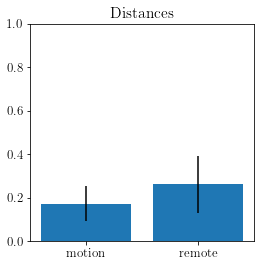

In [22]:
interfaces = ['remote', 'motion']

distances = {}

for i in interfaces:
    distances[i] = np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1],
   [np.mean(distances['motion']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['remote'])])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

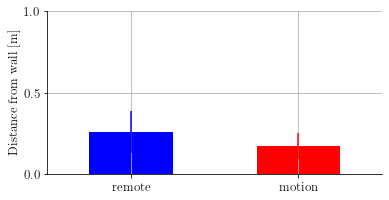

In [23]:
c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 2.5])
plt.ylabel('Distance from wall [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('distances_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

In [24]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal
from scipy.stats import levene

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 6],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [26]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

def dfFromCSV(file):
    df = pd.read_csv(file)

    if 'rosout__file' in list(df):
        df = df.drop(['Unnamed: 0', 'rosout__file', 'rosout__function', 'rosout__level', 'rosout__line', 'rosout__msg', 'rosout__name', 'rosout_agg__line', 'rosout_agg__msg', 'rosout_agg__name', 'rosout_agg__file', 'rosout_agg__function', 'rosout_agg__level'], axis=1)
    df = df.interpolate()
    df = df.iloc[::20, :]
    df = df.dropna()
    return df

In [27]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [28]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/"
subjects = glob.glob(path_to_folder + "*/" + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_2/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_2/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_3/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_3/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_4/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_4/remote/']

## Remove outliers

In [29]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

# Import data

In [30]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
#     print(subject)
    files = glob.glob(subject+"exp2/"+"*.csv")
    files.sort()
    
    for i in files:
        print(i)
    
#     if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
#         print(subject)
#         print('wrong number of experiments!')
#         break
    for file in files:
        print('.')
        logs[subject].append(dfFromCSV(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/1.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/2.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/3.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/4.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/5.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp2/6.csv
.
.
.
.
.
.
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/remote/exp2/1x.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/D

In [31]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'remote' in x]
sub_motion = [x for x in subjects if 'motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

# logs['last remote']

# Analysis scripts

In [32]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def t_test_levene(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = levene(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsXAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def runHapticsZAnalysis(f, logs):
    
    varX = {}
    varY = {}

    varX['means'] = []
    varX['stds'] = []
    varY['means'] = []
    varY['stds'] = []

    for i in interfaces:
        varX[i] = []
        varY[i] = []
        for jdx, j in enumerate(logs[i]):
#             j = logs[i][10]

            ret = f(j, [i, jdx])
            varX[i].append(ret[0])
            varY[i].append(ret[1])
        print(i)
        print(varX[i])
        print(varY[i])

        varX['means'].append(np.mean(varX[i]))
        varX['stds'].append(np.std(varX[i]))
        varY['means'].append(np.mean(varY[i]))
        varY['stds'].append(np.std(varY[i]))

        print('mean = ', varX['means'][-1])
        print('std = ', varX['stds'][-1])
        print('mean = ', varY['means'][-1])
        print('std = ', varY['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                tX, pX = t_test_kruskal(varX[i],varX[j])
                tY, pY = t_test_kruskal(varY[i],varY[j])
                
                print('')
                print(i,j, ' X')
                print_p(pX)
                print('')
                print(i,j, ' Y')
                print_p(pY)
                
    return [varX, varY]

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [33]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

In [34]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Bidir - haptics ZY collisions - HW - Sheet1.csv')

In [35]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]



consider all runs

mean motion =  0.5
std motion =  0.5
mean remote =  1.75
std remote =  0.4330127018922193

total motion =  2
total remote =  7

p = 0.03247332032606955 !!!!!!

consider first runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.25
std remote =  0.4330127018922193

total motion =  0
total remote =  1

p = 0.3173105078629121

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.5
std remote =  0.5

total motion =  0
total remote =  2

p = 0.12663045794761676


Text(0.5, 1.0, 'Collisions - last run')

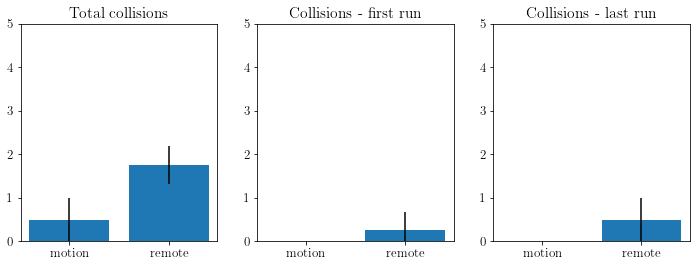

In [36]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided Z'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided Z'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

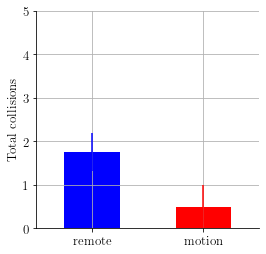

In [37]:

c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

all_r_Z = all_r
all_m_Z = all_m

# Go-through passing Analysis

In [38]:
def comp_max_dist(df, info):

    tit = info[0] + str(info[1])
    
    dist_obstacle = -0.82
    collider = 0.1

    x_cross = dist_obstacle + collider
    
    x = df['vrpn_client_node_cf1_pose__pose_position_x'].values
#     plt.figure()
#     plt.plot(-df['vrpn_client_node_cf1_pose__pose_position_x'],-df['vrpn_client_node_cf1_pose__pose_position_y'])
#     plt.plot([-x_cross, -x_cross],[-4, 4])
#     plt.xlim(0.5,1)
#     plt.ylim(-4,4)
#     plt.title(tit)
    
    ok = False
    for idx,i in enumerate(x):
        if idx>0:
            if x[idx-1]>x_cross and x[idx]<x_cross:
#                 print(idx)
                ok = True
                break
    
#     print(ok)
    
#     if idx==x.shape:
#         print('WELLA')
#         x_cross = dist_obstacle + 0.1
        
#         for idx,i in enumerate(x):
#             if idx>0:
#                 if x[idx-1]>x_cross and x[idx]<x_cross:
#     #                 print(idx)
#                     break
    
                
#     print([df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx], df['vrpn_client_node_cf1_pose__pose_position_z'].iloc[idx]])
    
    return [df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx], df['vrpn_client_node_cf1_pose__pose_position_z'].iloc[idx]]

logs1 = logs.copy()

logs1.pop('remote')

cross_ret = runHapticsZAnalysis(comp_max_dist, logs)

motion
[-3.40892666578, -3.4905389944699996, -3.6578122947569573, -3.40727639198, -3.401728916168, -3.5342057618218186, -3.402730894086, -3.4378703236575, -3.15618443489, -3.4305615425100005, -2.51065794627, -3.4235468591928573, -3.3631950428621056, -3.4481802237668417, -3.489967454565455, -3.5145057042433336, -3.4088480949368, -3.4352048635449997, -3.46075177193, -3.467454612255, -3.4443356990800007]
[0.5931991338729999, 0.8033979137736666, 0.8560268179231304, 0.793421506882, 0.6830439448354, 0.7185401699761819, 0.6319354176523999, 0.6589292734860001, 0.78212428093, 0.6072733700274999, 0.779233018557, 0.9140619124687144, 0.8927351393194211, 0.8947345645806315, 0.9024515151978182, 0.8491789102553333, 0.9410468864437199, 0.860530048609, 0.846425235271, 0.903165847063, 0.927427649498]
mean =  -3.3949754520365563
std =  0.21624417349003078
mean =  0.8018515503153771
std =  0.10874560183515783

remote
[-3.3025535345075, -2.99383325577, -3.0335609912874997, -3.408803701405, -3.33051729202, 

In [39]:
coord = ['X', 'Y']
cross = {}
x_center = -3.47
y_center = 0.75

cross_dic = {'X':cross_ret[0], 'Y':cross_ret[1]}
center = {'X':x_center, 'Y':y_center}

for c in coord:
    cross[c] = {}
    for i in interfaces:
        cross[c][i] = np.array(cross_dic[c][i]) - center[c]

In [40]:
bug = 11
# print(cross['X']['motion'])
# print(cross['Y']['motion'])

# plt.bar(range(0,21),cross['X']['motion'])
# plt.bar(range(0,21),cross['Y']['motion'])

cross['X']['motion']= np.append(cross['X']['motion'][:bug-1], cross['X']['motion'][bug:])
cross['Y']['motion']= np.append(cross['Y']['motion'][:bug-1], cross['Y']['motion'][bug:])

# print(cross['X']['motion'])
# print(cross['Y']['motion'])

# plt.figure()
# plt.bar(range(0,20),cross['X']['motion'])
# plt.bar(range(0,20),cross['Y']['motion'])

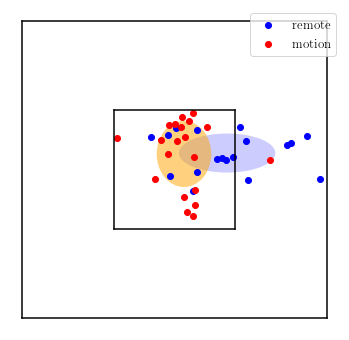

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(cross['X']['remote'], cross['Y']['remote'], color = 'b', label = 'remote')
ax.scatter(cross['X']['motion'], cross['Y']['motion'], color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

# plt.xlim([-0.6, 0.6])
# plt.ylim([-0.6, 0.6])

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross['X']['remote']), np.mean(cross['Y']['remote'])), width=np.std(cross['X']['remote'])*2,
        height=np.std(cross['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['X']['motion']), np.mean(cross['Y']['motion'])), width=np.std(cross['X']['motion'])*2,
        height=np.std(cross['Y']['motion'])*2,
        alpha=0.5,
        facecolor='orange', zorder=-1)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

cross_z = cross

0.1723990337542014
0.158443861608326
0.030808672675116687
0.08968669644397526
p = 0.011020801813016404 !!!!!!
0.05627024393664767
0.06585330269089151
0.05298247690329585
0.1113104995969505
p = 0.11164705837971241


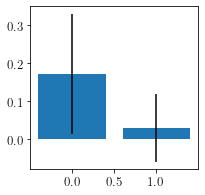

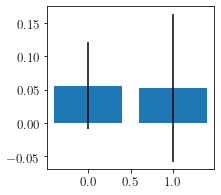

In [42]:
for c in coord:

    print(np.mean(cross[c]['remote']))
    print(np.std(cross[c]['remote']))
    print(np.mean(cross[c]['motion']))
    print(np.std(cross[c]['motion']))

    fig = plt.figure(figsize=[3,3])
    ax = fig.add_subplot(111)

    ax.bar([0,1], 
            [np.mean(cross[c]['remote']), np.mean(cross[c]['motion'])],
          yerr = [np.std(cross[c]['remote']), np.std(cross[c]['motion'])])

    print_p(t_test_levene(cross[c]['remote'], cross[c]['motion'])[1])

# TEST

In [43]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal
from scipy.stats import levene

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 6],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [45]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

def dfFromCSV(file):
    df = pd.read_csv(file)

    if 'rosout__file' in list(df):
        df = df.drop(['Unnamed: 0', 'rosout__file', 'rosout__function', 'rosout__level', 'rosout__line', 'rosout__msg', 'rosout__name', 'rosout_agg__line', 'rosout_agg__msg', 'rosout_agg__name', 'rosout_agg__file', 'rosout_agg__function', 'rosout_agg__level'], axis=1)
    df = df.interpolate()
    df = df.iloc[::20, :]
    df = df.dropna()
    return df

In [46]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [47]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/"
subjects = glob.glob(path_to_folder + "*/" + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_2/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_2/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_3/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_3/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_4/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_4/remote/']

## Remove outliers

In [48]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

# Import data

In [49]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
#     print(subject)
    files = glob.glob(subject+"exp3/"+"*.csv")
    files.sort()
    
    for i in files:
        print(i)
    
#     if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
#         print(subject)
#         print('wrong number of experiments!')
#         break
    for file in files:
        print('.')
        logs[subject].append(dfFromCSV(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp3/1.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp3/2.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp3/3.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp3/4.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/motion/exp3/5.csv
.
.
.
.
.
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/remote/exp3/1.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/haptics/sub_02/remote/exp3/2.csv
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA

In [50]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'remote' in x]
sub_motion = [x for x in subjects if 'motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

# logs['last remote']

# Analysis scripts

In [51]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def t_test_levene(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = levene(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsXAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def runHapticsZAnalysis(f, logs):
    
    varX = {}
    varY = {}

    varX['means'] = []
    varX['stds'] = []
    varY['means'] = []
    varY['stds'] = []

    for i in interfaces:
        varX[i] = []
        varY[i] = []
        for jdx, j in enumerate(logs[i]):
#             j = logs[i][10]

            ret = f(j, [i, jdx])
            varX[i].append(ret[0])
            varY[i].append(ret[1])
        print(i)
        print(varX[i])
        print(varY[i])

        varX['means'].append(np.mean(varX[i]))
        varX['stds'].append(np.std(varX[i]))
        varY['means'].append(np.mean(varY[i]))
        varY['stds'].append(np.std(varY[i]))

        print('mean = ', varX['means'][-1])
        print('std = ', varX['stds'][-1])
        print('mean = ', varY['means'][-1])
        print('std = ', varY['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                tX, pX = t_test_kruskal(varX[i],varX[j])
                tY, pY = t_test_kruskal(varY[i],varY[j])
                
                print('')
                print(i,j, ' X')
                print_p(pX)
                print('')
                print(i,j, ' Y')
                print_p(pY)
                
    return [varX, varY]

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [52]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

# Collision Analysis

In [53]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Bidir - haptics ZY collisions - HW - Sheet1.csv')

In [54]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]



consider all runs

mean motion =  0.5
std motion =  0.5
mean remote =  1.75
std remote =  0.82915619758885

total motion =  2
total remote =  7


consider first runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.0
std remote =  0.0

total motion =  0
total remote =  0


consider last runs

mean motion =  0.25
std motion =  0.4330127018922193
mean remote =  0.5
std remote =  0.5

total motion =  1
total remote =  2



Text(0.5, 1.0, 'Collisions - last run')

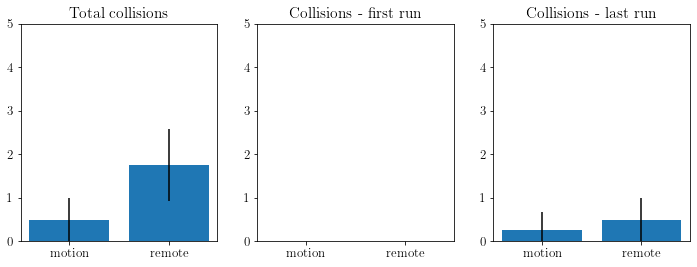

In [55]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided Y'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided Y'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

#     t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

#     print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

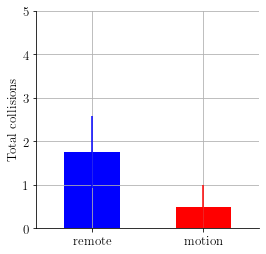

In [56]:

c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

all_r_Y = all_r
all_m_Y = all_m

savefig('collisions_Y_HW.pdf', bbox_inches='tight')

# Go-through passing Analysis

In [57]:
def comp_max_dist(df, info):

    tit = info[0] + str(info[1])
    
    dist_obstacle = 1.55
    collider = 0.0

    x_cross = dist_obstacle + collider
    
    x = df['vrpn_client_node_cf1_pose__pose_position_z'].values
#     plt.figure()
#     plt.plot(-df['vrpn_client_node_cf1_pose__pose_position_y'], df['vrpn_client_node_cf1_pose__pose_position_z'])
#     plt.plot([-4, 4], [x_cross, x_cross])
# #     plt.xlim(0.5,1)
# #     plt.ylim(-4,4)
#     plt.title(tit)
    
    ok = False
    for idx,i in enumerate(x):
        if idx>0:
            if x[idx-1]>x_cross and x[idx]<x_cross and -df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx]>2.55:
#                 print(idx)
#                 ok = True
                break
    
    if df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx]>0:
        
        x_cross = x_cross+0.1
        for idx,i in enumerate(x):
            if idx>0:
                if x[idx-1]>x_cross and x[idx]<x_cross and -df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx]>2.55:
    #                 print(idx)
    #                 ok = True
                    break
        
    
#     print(ok)
    
#     if idx==x.shape:
#         print('WELLA')
#         x_cross = dist_obstacle + 0.1
        
#         for idx,i in enumerate(x):
#             if idx>0:
#                 if x[idx-1]>x_cross and x[idx]<x_cross:
#     #                 print(idx)
#                     break
    
                
#     print([df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx], df['vrpn_client_node_cf1_pose__pose_position_z'].iloc[idx]])
    
    return [df['vrpn_client_node_cf1_pose__pose_position_x'].iloc[idx], df['vrpn_client_node_cf1_pose__pose_position_y'].iloc[idx]]

logs1 = logs.copy()

logs1.pop('remote')

cross_ret = runHapticsZAnalysis(comp_max_dist, logs)

motion
[-3.35485447778, -3.3375028610219997, -3.423076256460869, -3.39797151089, -3.3771773179366673, -3.2092347565829416, -3.38032078743, -3.32590842247, -3.3596446514133333, -3.332056403159, -3.41958665848, -3.3846786816916663, -3.3215241432188884, -3.4159277166657143, -3.45063964526, -3.2185990129185718, -3.278383255, -3.3030698895425]
[-2.948665804335556, -3.069798851014, -3.0472264186221736, -2.9945018291500003, -3.0389180183400004, -2.894165067113529, -2.872174263, -2.9087562561, -2.9996174971266667, -3.0260188817990006, -3.09568190575, -3.1640129486766666, -3.2380147775022223, -3.003537757054286, -2.9418552716599997, -2.99572903769, 1.7372355461099998, -3.0872704982775003]
mean =  -3.349453135995675
std =  0.06506926921960351
mean =  -2.7549283076167557
std =  1.0932082619556445

remote
[-3.4032455285366665, -3.4040227777794114, -3.342508684504545, -3.4304163456, -3.4768922237280777, -3.3192189693485, -3.332197260858, -3.3529320716860003, -3.41652739048, -3.3712825245344447, -3.

In [58]:
coord = ['X', 'Y']
cross = {}
x_center = -3.38
y_center = -3.05

cross_dic = {'X':cross_ret[0], 'Y':cross_ret[1]}
center = {'X':x_center, 'Y':y_center}

for c in coord:
    cross[c] = {}
    for i in interfaces:
        cross[c][i] = np.array(cross_dic[c][i]) - center[c]

[ 0.02514552  0.04249714 -0.04307626 -0.01797151  0.00282268  0.17076524
 -0.00032079  0.05409158  0.02035535  0.0479436  -0.03958666 -0.00467868
  0.05847586 -0.03592772 -0.07063965  0.16140099  0.10161674  0.07693011]
[ 1.01334196e-01 -1.97988510e-02  2.77358138e-03  5.54981708e-02
  1.10819817e-02  1.55834933e-01  1.77825737e-01  1.41243744e-01
  5.03825029e-02  2.39811182e-02 -4.56819057e-02 -1.14012949e-01
 -1.88014778e-01  4.64622429e-02  1.08144728e-01  5.42709623e-02
  4.78723555e+00 -3.72704983e-02]
[ 0.02514552  0.04249714 -0.04307626 -0.01797151  0.00282268  0.17076524
 -0.00032079  0.05409158  0.02035535  0.0479436  -0.03958666 -0.00467868
  0.05847586 -0.03592772 -0.07063965  0.16140099  0.07693011]
[ 0.1013342  -0.01979885  0.00277358  0.05549817  0.01108198  0.15583493
  0.17782574  0.14124374  0.0503825   0.02398112 -0.04568191 -0.11401295
 -0.18801478  0.04646224  0.10814473  0.05427096 -0.0372705 ]


<BarContainer object of 17 artists>

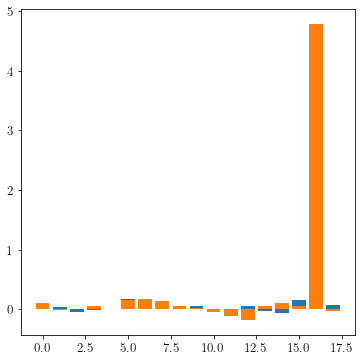

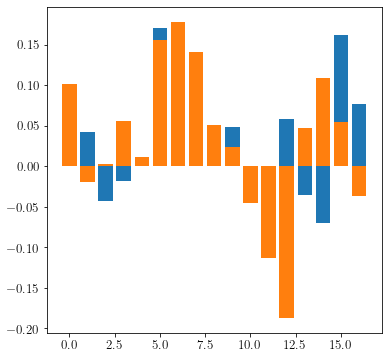

In [59]:
bug = 17
print(cross['X']['motion'])
print(cross['Y']['motion'])

plt.bar(range(0,18),cross['X']['motion'])
plt.bar(range(0,18),cross['Y']['motion'])

cross['X']['motion']= np.append(cross['X']['motion'][:bug-1], cross['X']['motion'][bug:])
cross['Y']['motion']= np.append(cross['Y']['motion'][:bug-1], cross['Y']['motion'][bug:])

print(cross['X']['motion'])
print(cross['Y']['motion'])

plt.figure()
plt.bar(range(0,17),cross['X']['motion'])
plt.bar(range(0,17),cross['Y']['motion'])

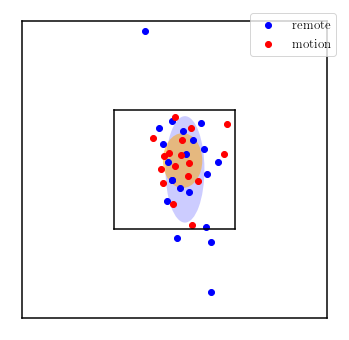

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

# t1 = cross['Y']['remote']
# t2 = cross['Y']['motion'] 

cross['Y']['remote'] = -cross['Y']['remote']
cross['Y']['motion'] = -cross['Y']['motion']

# cross['X']['remote'] = t1
# cross['X']['motion'] = t2

ax.scatter(cross['X']['remote'], cross['Y']['remote'], color = 'b', label = 'remote')
ax.scatter(cross['X']['motion'], cross['Y']['motion'], color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

# plt.xlim([-0.6, 0.6])
# plt.ylim([-0.6, 0.6])

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross['X']['remote']), np.mean(cross['Y']['remote'])), width=np.std(cross['X']['remote'])*2,
        height=np.std(cross['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['X']['motion']), np.mean(cross['Y']['motion'])), width=np.std(cross['X']['motion'])*2,
        height=np.std(cross['Y']['motion'])*2,
        alpha=0.5,
        facecolor='orange', zorder=-1)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

cross_y = cross

savefig('cross_Y_HW.pdf', bbox_inches='tight')

0.0340323056371041
0.06399312018238529
0.026366282769285078
0.06456375551541005
p = 0.6954288109995348
0.0011603365115819937
0.17950287359372805
0.030826759811082086
0.09245343781509693
p = 0.07254087568512559 !


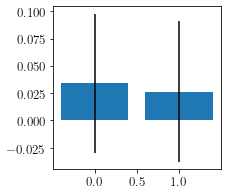

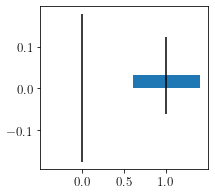

In [68]:
for c in coord:

    print(np.mean(cross[c]['remote']))
    print(np.std(cross[c]['remote']))
    print(np.mean(cross[c]['motion']))
    print(np.std(cross[c]['motion']))

    fig = plt.figure(figsize=[3,3])
    ax = fig.add_subplot(111)

    ax.bar([0,1], 
            [np.mean(cross[c]['remote']), np.mean(cross[c]['motion'])],
          yerr = [np.std(cross[c]['remote']), np.std(cross[c]['motion'])])

    print_p(t_test_levene(cross[c]['remote'], cross[c]['motion'])[1])

[1, 1, 3, 2]
[1, 0, 1, 0]
[1, 2, 2, 2]
[0, 1, 0, 1]


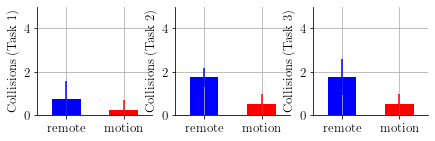

In [69]:
c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize=(7, 2))
ax = fig.add_subplot(131)
ax.bar([1],
   [np.mean(all_r_X),],
      yerr = [np.std(all_r_X)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m_X)],
      yerr = [np.std(all_m_X)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Collisions (Task 1)')
plt.grid()

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(132)
ax.bar([1],
   [np.mean(all_r_Z),],
      yerr = [np.std(all_r_Z)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m_Z)],
      yerr = [np.std(all_m_Z)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Collisions (Task 2)')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(133)
ax.bar([1],
   [np.mean(all_r_Y),],
      yerr = [np.std(all_r_Y)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m_Y)],
      yerr = [np.std(all_m_Y)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Collisions (Task 3)')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print(all_r_Y)
print(all_m_Y)
print(all_r_Z)
print(all_m_Z)

savefig('collisions_HW.pdf', bbox_inches='tight')

# TEST

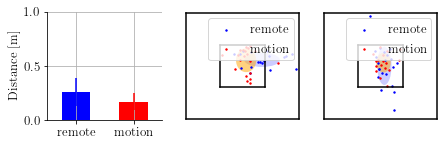

In [74]:
c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize = [7,2])
ax = fig.add_subplot(131)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 2.5])
plt.ylabel('Distance [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

###

ax = fig.add_subplot(132)

size = 2

ax.scatter(cross_z['X']['remote'], cross_z['Y']['remote'], s = size, color = 'b', label = 'remote')
ax.scatter(cross_z['X']['motion'], cross_z['Y']['motion'], s = size, color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.51, 0.51])
plt.ylim([-0.51, 0.51])

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross_z['X']['remote']), np.mean(cross_z['Y']['remote'])), width=np.std(cross_z['X']['remote'])*2,
        height=np.std(cross_z['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross_z['X']['motion']), np.mean(cross_z['Y']['motion'])), width=np.std(cross_z['X']['motion'])*2,
        height=np.std(cross_z['Y']['motion'])*2,
        alpha=0.5,
        facecolor='orange', zorder=-1)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

###

ax = fig.add_subplot(133)


ax.scatter(cross['X']['remote'], cross['Y']['remote'], s = size, color = 'b', label = 'remote')
ax.scatter(cross['X']['motion'], cross['Y']['motion'], s = size, color = 'r', label = 'motion')

l = 0.2
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')
l = 0.5
ax.plot([-l, -l], [-l, l] ,'k')
ax.plot([l, l], [-l, l] ,'k')
ax.plot([-l, l], [-l, -l] ,'k')
ax.plot([-l, l], [l, l] ,'k')

plt.xlim([-0.51, 0.51])
plt.ylim([-0.51, 0.51])

plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.legend(loc = 'upper right')


ellipse = Ellipse((np.mean(cross['X']['remote']), np.mean(cross['Y']['remote'])), width=np.std(cross['X']['remote'])*2,
        height=np.std(cross['Y']['remote'])*2,
        alpha=0.2,
        facecolor='blue', zorder=-2)
ax.add_patch(ellipse)


ellipse = Ellipse((np.mean(cross['X']['motion']), np.mean(cross['Y']['motion'])), width=np.std(cross['X']['motion'])*2,
        height=np.std(cross['Y']['motion'])*2,
        alpha=0.5,
        facecolor='orange', zorder=-1)
ax.add_patch(ellipse)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

savefig('cross_HW.pdf', bbox_inches='tight')